In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/user_transactions.csv')

# Display the first few rows
data.head()


,Transaction ID,User ID,Transaction Date,Transaction Time,Product ID,Product Price,Quantity,Discount Applied,Payment Method,User Age,User Gender,User Location,User Membership Status,Device Used,Referral Source,Transaction Status,User Tenure,Product Category,Amount
0,1,4047,2023-11-26,14:18:07,1029,125.70,1,5,Credit Card,30,Female,Athens,Regular,Desktop,Social Media,Completed,42,Clothing,125.7
1,2,4430,2023-11-25,06:44:25,1050,80.10,2,5,PayPal,25,Male,Athens,Premium,Desktop,Social Media,Completed,16,Electronics,160.2
2,3,3759,2023-09-16,20:43:25,1095,81.40,2,5,Credit Card,42,Male,Patras,Premium,Mobile,Social Media,Completed,12,Books,162.8
3,4,1598,2023-12-21,09:11:03,1000,89.45,2,5,PayPal,39,Female,Thessaloniki,Regular,Mobile,Social Media,Completed,32,Clothing,178.9
4,5,6531,2023-01-23,16:22:27,1019,147.90,3,0,Credit Card,39,Male,Athens,Premium,Desktop,Social Media,Completed,1,Books,443.7


The dataset contains the following columns:

* Transaction ID: Unique identifier for each transaction.

* User ID: Unique identifier for each user.
* Transaction Date and Transaction Time: Information about when the transaction occurred.
* Product ID: Unique identifier for each product.
* Product Price, Quantity, Discount Applied: Information related to the product's price and the transaction specifics.
* Payment Method: Method used for the payment (Credit Card, PayPal, etc.).
* User Age, User Gender, User Location, User Membership Status: Demographic and membership details of the user.
* Device Used: Device through which the transaction was made (Desktop, Mobile, etc.).
* Referral Source: Source of referral (e.g., Social Media).
* Transaction Status: Status of the transaction (Completed, Pending, etc.).
* User Tenure: Tenure (in months) indicating the duration since the user registered.
* Product Category: Category of the purchased product.
* Amount: Total amount of the transaction.





# **Data Preprocessing and Exploration Data Analysis**

In [2]:
# Step 1: Data Preprocessing
# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

# Preprocessing: Checking for any conversions needed and summarizing key metrics
summary_stats = data.describe().T
summary_stats_categorical = data.describe(include='object').T

missing_values, data_types, summary_stats, summary_stats_categorical


(Transaction ID            0
 User ID                   0
 Transaction Date          0
 Transaction Time          0
 Product ID                0
 Product Price             0
 Quantity                  0
 Discount Applied          0
 Payment Method            0
 User Age                  0
 User Gender               0
 User Location             1
 User Membership Status    0
 Device Used               0
 Referral Source           0
 Transaction Status        0
 User Tenure               0
 Product Category          0
 Amount                    0
 dtype: int64,
 Transaction ID              int64
 User ID                     int64
 Transaction Date           object
 Transaction Time           object
 Product ID                  int64
 Product Price             float64
 Quantity                    int64
 Discount Applied            int64
 Payment Method             object
 User Age                    int64
 User Gender                object
 User Location              object
 User Membersh

* The average transaction amount is approximately 251(euros?), with a maximum of around 889. The distribution shows variability, suggesting different spending behaviors or product pricing.
* User age ranges from 18 to 69, with an average of 36. The standard deviation is about 10 years, indicating a reasonable spread in the customer age group.
* Product Price averages around 110, with most products priced between 89 and 130 (as shown by the 25th to 75th percentiles).
* Discount Applied varies, with values between 0 and 30, indicating different discount strategies.


<ipython-input-3-aa1e04cee3ed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transaction DateTime'] = pd.to_datetime(data['Transaction Date'] + ' ' + data['Transaction Time'])


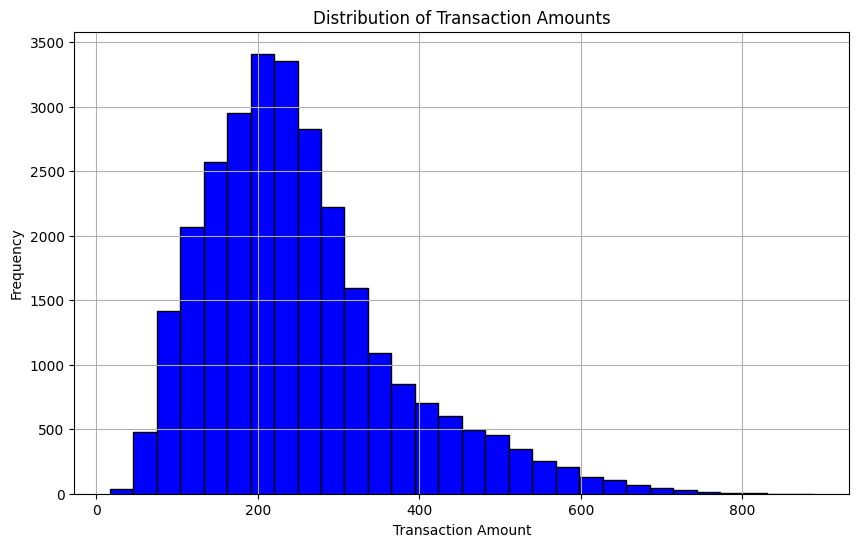

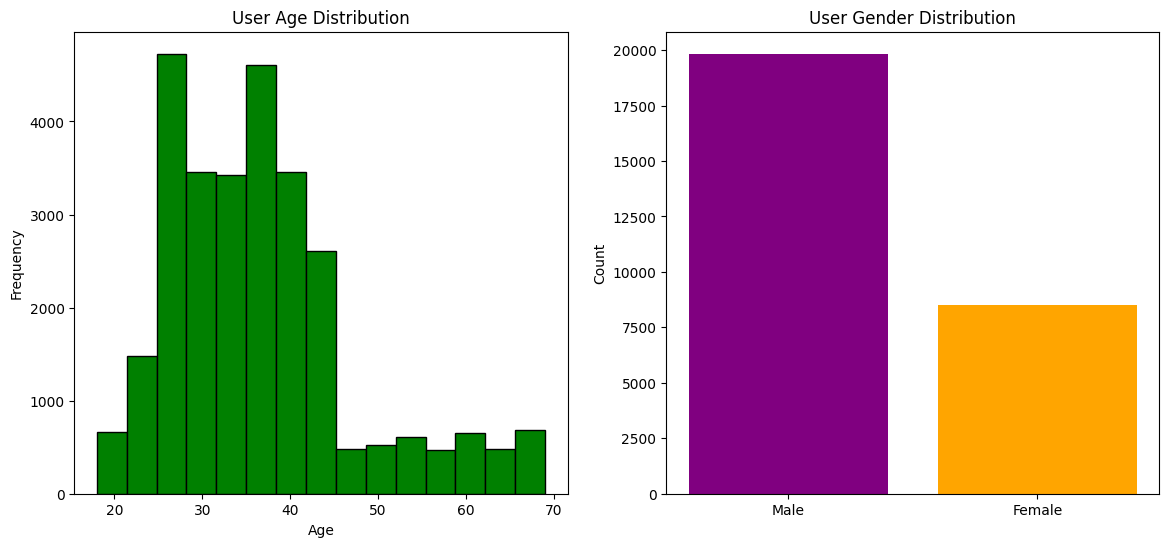

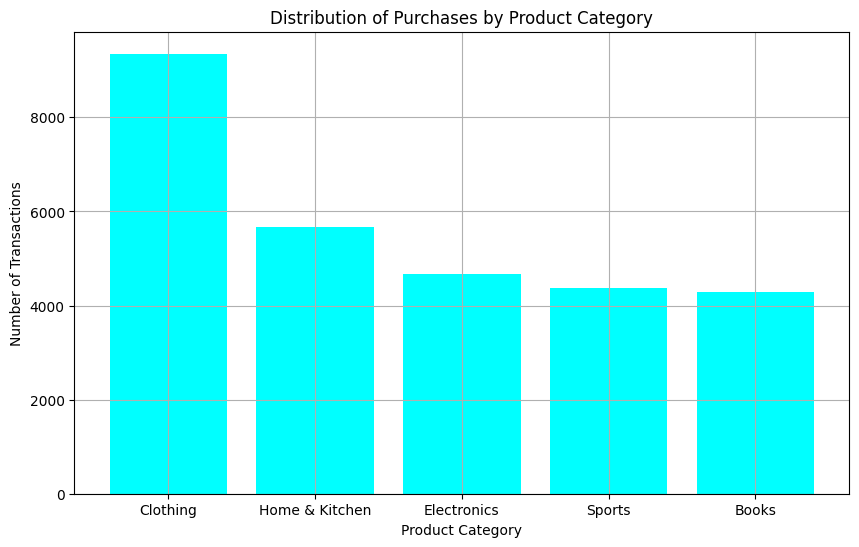

In [3]:
# Step 1: Data Cleaning

# Handling missing value in "User Location" - Dropping the row with missing location as it's just a single instance
data = data.dropna(subset=['User Location'])

# Converting "Transaction Date" and "Transaction Time" into a single datetime column
data['Transaction DateTime'] = pd.to_datetime(data['Transaction Date'] + ' ' + data['Transaction Time'])

# Dropping the original date and time columns as they are now combined
data = data.drop(columns=['Transaction Date', 'Transaction Time'])

# Step 2: Visualizing distribution of transaction amounts
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data['Amount'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Analysis of User Demographics: Age distribution and gender distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(data['User Age'], bins=15, color='green', edgecolor='black')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
gender_counts = data['User Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color=['purple', 'orange'])
plt.title('User Gender Distribution')
plt.ylabel('Count')
plt.show()

# Product category analysis
plt.figure(figsize=(10, 6))
category_counts = data['Product Category'].value_counts()
plt.bar(category_counts.index, category_counts.values, color='cyan')
plt.title('Distribution of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


1. Distribution of Transaction Amounts:

* The histogram of transaction amounts reveals a skewed distribution, indicating that most transactions fall within a certain range, with fewer high-value transactions. This suggests the presence of higher-priced premium products or bulk purchases.


2. User Demographics Analysis:

* Age Distribution: The age distribution of users is relatively normal, peaking between the ages of 30 to 40. This implies that the majority of the store's customers are in their mid-30s.
* Gender Distribution: There is a higher proportion of male customers compared to female customers, indicating a potential gender-specific preference or targeting in marketing.


3. Product Category Analysis:

* The bar plot shows that "Clothing" is the most frequently purchased category, followed by "Electronics" and "Books". This indicates that clothing products might be a significant revenue driver for the store.


**Checking for duplicates**

In [4]:
print(f"The dataset contains {data.duplicated().sum()} duplicate rows that need to be removed.")


The dataset contains 0 duplicate rows that need to be removed.


In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering.
However there are no duplicates.

**Transaction Status**

In [5]:

# Print the unique values of 'Transaction Status'
print(data['Transaction Status'].unique())

# prompt: find the percentage of cancelled transactions in  Transaction Status

# Calculate the percentage of cancelled transactions
cancelled_transactions = data['Transaction Status'].value_counts(normalize=True)['Canceled'] * 100
pending_transactions = data['Transaction Status'].value_counts(normalize=True)['Pending'] * 100

print(f"Percentage of cancelled transactions: {cancelled_transactions:.2f}%")
print(f"Percentage of pending transactions: {pending_transactions:.2f}%")

['Completed' 'Pending' 'Canceled']
Percentage of cancelled transactions: 3.33%
Percentage of pending transactions: 4.21%


In [6]:
summary_stats_categorical = data[data['Transaction Status']== 'Canceled'].describe()
summary_stats_categorical

,Transaction ID,User ID,Product ID,Product Price,Quantity,Discount Applied,User Age,User Tenure,Amount,Transaction DateTime
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943
mean,13670.892895,15097.313892,1050.177094,110.413521,2.267232,11.447508,35.997879,29.945917,251.036638,2023-08-14 12:23:30.864262912
min,34.000000,1009.000000,1000.000000,32.500000,1.000000,0.000000,18.000000,1.000000,46.400000,2023-01-02 00:55:37
25%,6691.000000,7959.500000,1027.000000,89.075000,2.000000,5.000000,28.000000,16.000000,166.800000,2023-05-17 13:17:52
50%,13342.000000,14919.000000,1052.000000,107.800000,2.000000,5.000000,34.000000,29.000000,231.600000,2023-09-09 04:23:20
75%,20487.500000,22338.000000,1074.000000,131.200000,3.000000,20.000000,40.000000,45.000000,301.750000,2023-12-02 09:42:10
max,28342.000000,29336.000000,1099.000000,199.100000,4.000000,30.000000,69.000000,59.000000,732.800000,2023-12-29 16:38:06
std,8124.890051,8312.395561,28.577853,29.289740,0.885515,9.307164,10.429624,16.836741,123.011659,NaN


**Strategy for Handling Cancelled Transactions:**
Considering the project's objective to cluster customers based on their purchasing behavior and preferences, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

* Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.


Number of unique stock codes: 100


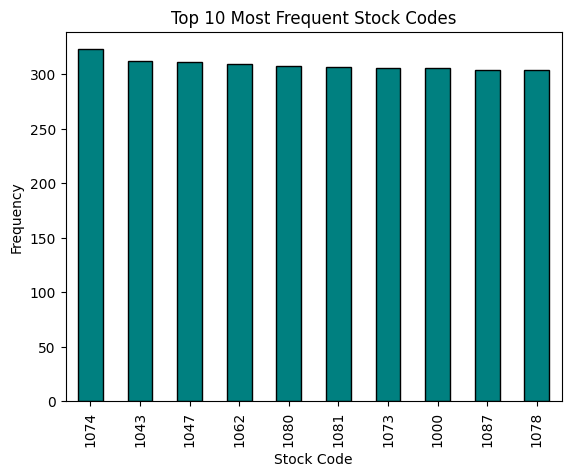

In [7]:
# prompt: First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes:

import pandas as pd
import matplotlib.pyplot as plt


# Find the number of unique stock codes
unique_stock_codes = data['Product ID'].nunique()
print(f"Number of unique stock codes: {unique_stock_codes}")

# Plot the top 10 most frequent stock codes
top_10_stock_codes = data['Product ID'].value_counts().head(10)
top_10_stock_codes.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Stock Code')
plt.ylabel('Frequency')
plt.show()



**Anomaly Detection**

In [8]:

# Convert 'Product ID' column to string type
data['Product ID'] = data['Product ID'].astype(str)

# Find stock codes with 0 numeric characters
stock_codes_with_0_numeric = data['Product ID'][data['Product ID'].str.match(r'^[^\d]+$')]
print("Stock codes with 0 numeric characters:\n", stock_codes_with_0_numeric)

# Find stock codes with 1 numeric character
stock_codes_with_1_numeric = data['Product ID'][data['Product ID'].str.match(r'^[^\d]*\d[^\d]*$')]
print("\nStock codes with 1 numeric character:\n", stock_codes_with_1_numeric)

Stock codes with 0 numeric characters:
 Series([], Name: Product ID, dtype: object)

Stock codes with 1 numeric character:
 Series([], Name: Product ID, dtype: object)


# **Analysis**

**Analysis by Location**

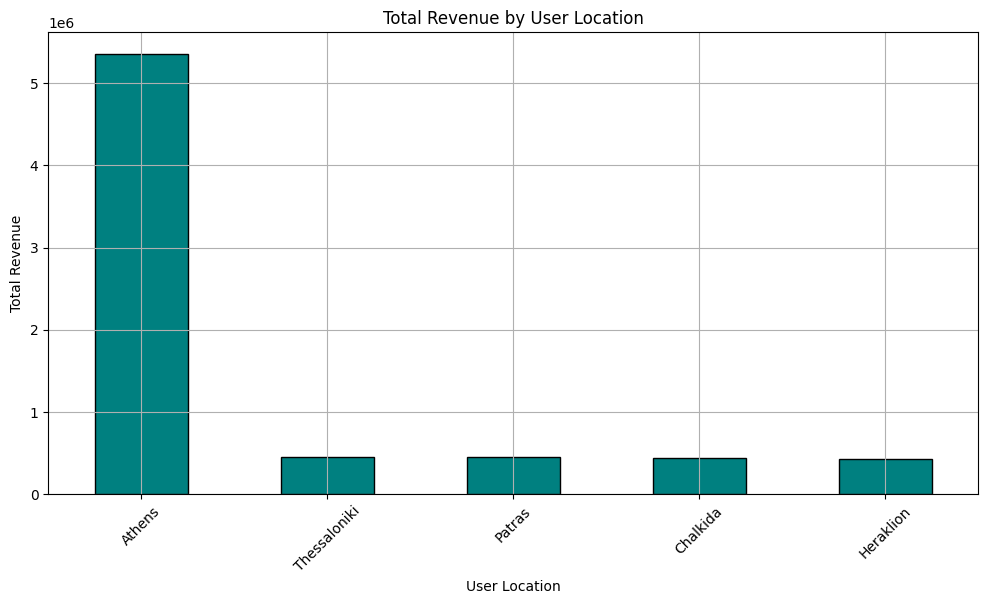

In [9]:
# !pip install ace_tools
#import ace_tools as tools

# Grouping data by location and calculating total revenue for each location
location_revenue = data.groupby('User Location')['Amount'].sum().sort_values(ascending=False)

# Visualizing revenue trends by location
plt.figure(figsize=(12, 6))
location_revenue.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Revenue by User Location')
plt.xlabel('User Location')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Summary of the total revenue by location
location_revenue_summary = location_revenue.reset_index()
# tools.display_dataframe_to_user(name="Location Revenue Summary", dataframe=location_revenue_summary)


The bar chart and the summarized table show the total revenue by each user location. From the analysis:

* Athens generates the highest revenue by a significant margin compared to other locations. This indicates that Athens is a crucial market for the store.
* Thessaloniki, Patras, Chalkida, and Heraklion follow Athens, but their contribution to the total revenue is much smaller.

Insights and Recommendations:
* Athens as a Key Market: Given the substantial revenue from Athens, targeted marketing campaigns or exclusive promotions in this region may yield higher returns.
* Potential in Other Regions: The other cities like Thessaloniki and Patras could be targeted with region-specific promotions to increase their revenue contributions.
* Location-based Offers: Consider location-specific discounts or promotions in the lower-revenue cities to boost sales.


In [10]:

# Calculate total revenue
total_revenue = data['Amount'].sum()

# Calculate revenue from Athens
athens_revenue = data[data['User Location'] == 'Athens']['Amount'].sum()

# Calculate percentage of total revenue from Athens
percentage_athens_revenue = (athens_revenue / total_revenue) * 100

print(f"Percentage of total revenue from Athens: {percentage_athens_revenue:.2f}%")

Percentage of total revenue from Athens: 75.09%


**Seasonal Sales Trends (Monthly Revenue)**

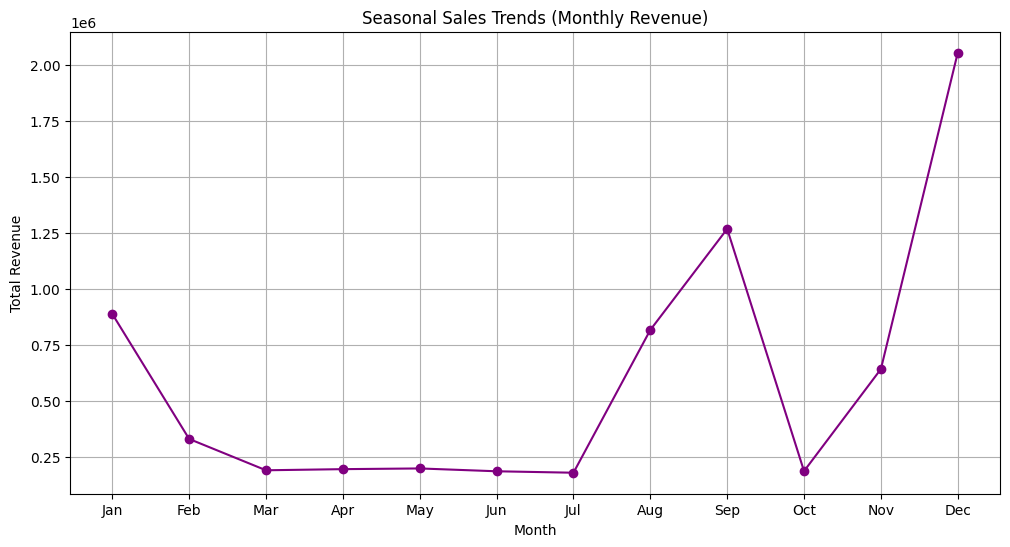

In [11]:
# Step 1: Extracting month from the transaction datetime for seasonal analysis
data['Transaction Month'] = data['Transaction DateTime'].dt.month

# Step 2: Grouping data by month and calculating total revenue
monthly_revenue = data.groupby('Transaction Month')['Amount'].sum()

# Visualizing the seasonal sales trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title('Seasonal Sales Trends (Monthly Revenue)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Displaying the summary of monthly revenue
monthly_revenue_summary = monthly_revenue.reset_index()


The line chart shows the total revenue for each month, reflecting the store's seasonal sales trends. From the analysis:

* November, December and January stands out as the month with the highest revenue, indicating a potential pre- and post-holiday sales spike.
* There is a noticeable dip in sales during the months of February through July, which may indicate a period of lower customer spending or less promotional activity.
* Revenue remains relatively steady from May through November, with slight fluctuations, but without major peaks.



Recommendations Based on Seasonal Trends:
* Post-Holiday Promotions: Capitalize on the higher revenue in January by offering targeted post-holiday promotions and discounts.
* Boost Low Sales Months: During February to April, consider introducing campaigns or promotions to increase customer engagement and spending.
* Pre-Holiday Marketing: Prepare for potential sales increases around November and December by ramping up advertising and stocking popular items.


<ipython-input-12-ad79b599a371>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_counts = data.groupby(['Transaction Month', 'Discount Range'])['Discount Applied'].count().unstack()


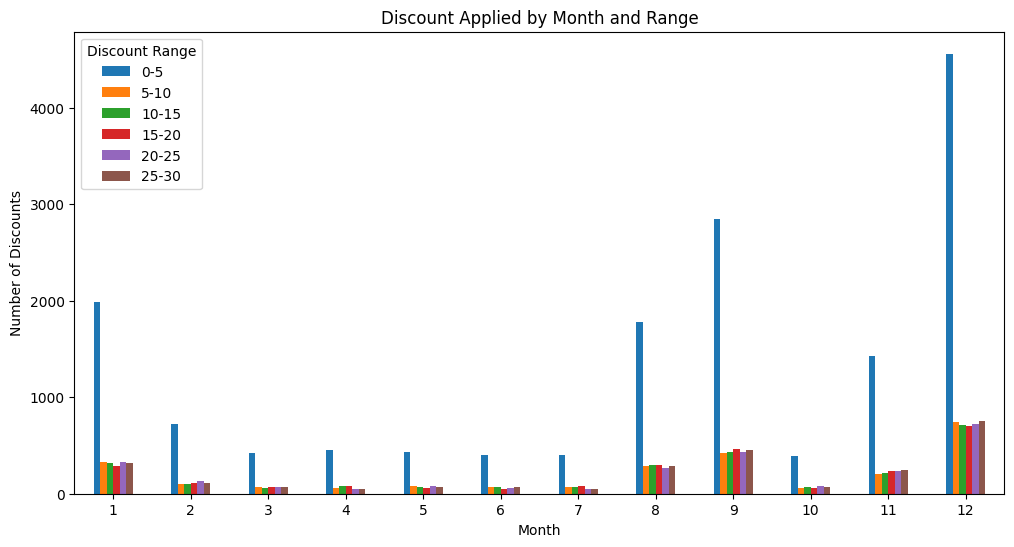

In [12]:
# prompt: for each month show the amount of discounts with a barplot but also split for each months the discounts into groups e.g 5 to 10

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data' and has a 'Transaction DateTime' column
# and a 'Discount Applied' column

# Convert 'Transaction DateTime' to datetime objects if it's not already
data['Transaction DateTime'] = pd.to_datetime(data['Transaction DateTime'])

# Extract the month from the transaction date
data['Transaction Month'] = data['Transaction DateTime'].dt.month

# Create bins for discount ranges (e.g., 0-5, 5-10, 10-15, etc.)
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
data['Discount Range'] = pd.cut(data['Discount Applied'], bins=bins, labels=labels, include_lowest=True)

# Group data by month and discount range, counting the number of discounts
discount_counts = data.groupby(['Transaction Month', 'Discount Range'])['Discount Applied'].count().unstack()

# Plot the bar chart
discount_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Discount Applied by Month and Range')
plt.xlabel('Month')
plt.ylabel('Number of Discounts')
plt.xticks(rotation=0)
plt.legend(title='Discount Range')
plt.show()

* Peak Revenue Months and Discount Levels: The months with the highest total revenue (e.g., January, August, and December) also coincide with months where the number of discounts, particularly in the 0-5% range, is high. This pattern suggests that even small discounts are effective in boosting overall sales during these periods.
* Revenue Dips and Lower Discounts: During the months where revenue is significantly lower (e.g., February to July), the number of discounts applied also drops. This points to a possible direct relationship where reduced discounting correlates with decreased sales volume.

Check if discounts on some product categories are more impactful but does not seem like it. The proportions of discount seem pretty similar between categories and months.

<ipython-input-13-cbd89bb7f8fd>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_category_counts = data.groupby(['Transaction Month', 'Discount Range', 'Product Category'])['Discount Applied'].count().unstack('Product Category')


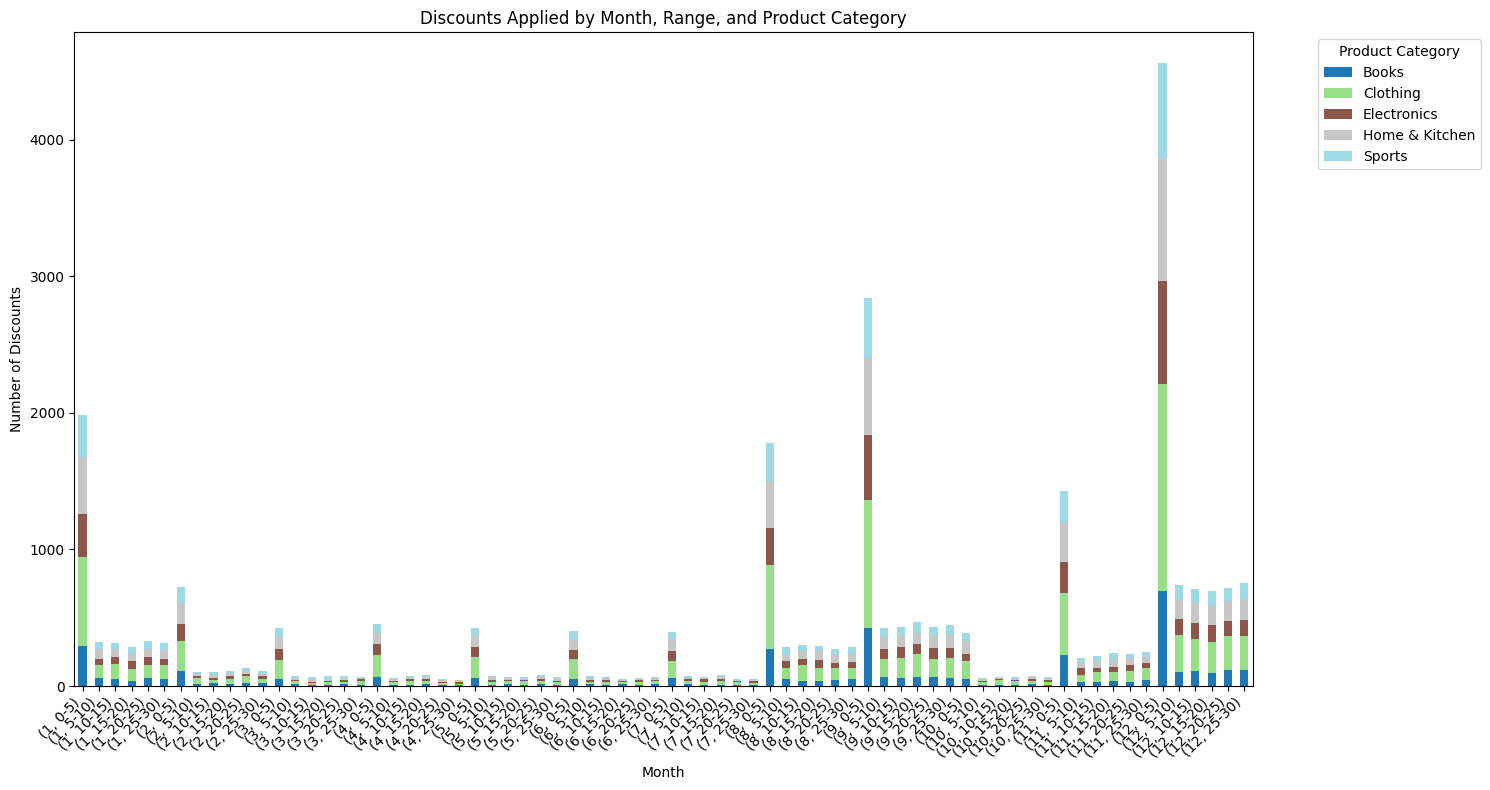

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Transaction DateTime' to datetime objects if it's not already
data['Transaction DateTime'] = pd.to_datetime(data['Transaction DateTime'])

# Extract the month from the transaction date
data['Transaction Month'] = data['Transaction DateTime'].dt.month

# Create bins for discount ranges (e.g., 0-5, 5-10, 10-15, etc.)
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust as needed
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
data['Discount Range'] = pd.cut(data['Discount Applied'], bins=bins, labels=labels, include_lowest=True)

# Group data by month, discount range, and product category, counting the number of discounts
discount_category_counts = data.groupby(['Transaction Month', 'Discount Range', 'Product Category'])['Discount Applied'].count().unstack('Product Category')

# Plot the bar chart
ax = discount_category_counts.plot(kind='bar', stacked=True, figsize=(15, 8), cmap='tab20')
plt.title('Discounts Applied by Month, Range, and Product Category')
plt.xlabel('Month')
plt.ylabel('Number of Discounts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust the legend to be outside the plot
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()



In [14]:
'''# prompt: check correlation between total discounts, age, location, gender and total monthly amount
data['total_m_revenue'] = monthly_revenue
# Calculate the correlation matrix
correlation_matrix = data[['Discount Applied', 'User Age', 'total_m_revenue']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# You can also calculate the correlation between specific columns individually
correlation_discount_age = data['Discount Applied'].corr(data['User Age'])
correlation_discount_amount = data['Discount Applied'].corr(data['total_m_revenue'])
print(f"Correlation between Discount and Age: {correlation_discount_age}")
print(f"Correlation between Discount and Amount: {correlation_discount_amount}")


# Convert 'User Gender' and 'User Location' to numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['User Gender', 'User Location'], prefix=['Gender', 'Location'])

# Calculate correlation including the encoded gender and location
correlation_matrix = data[['Discount Applied', 'User Age', 'total_m_revenue'] + list(data.columns[data.columns.str.startswith(('Gender', 'Location'))])].corr()

# Display the correlation matrix
correlation_matrix'''

# You can then analyze the correlations between Total Monthly Amount and other variables
# to understand how they relate to each other.

'# prompt: check correlation between total discounts, age, location, gender and total monthly amount\ndata[\'total_m_revenue\'] = monthly_revenue\n# Calculate the correlation matrix\ncorrelation_matrix = data[[\'Discount Applied\', \'User Age\', \'total_m_revenue\']].corr()\n\n# Display the correlation matrix\nprint(correlation_matrix)\n\n# Create a heatmap to visualize the correlations\nimport seaborn as sns\nplt.figure(figsize=(8, 6))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\nplt.title(\'Correlation Matrix\')\nplt.show()\n\n# You can also calculate the correlation between specific columns individually\ncorrelation_discount_age = data[\'Discount Applied\'].corr(data[\'User Age\'])\ncorrelation_discount_amount = data[\'Discount Applied\'].corr(data[\'total_m_revenue\'])\nprint(f"Correlation between Discount and Age: {correlation_discount_age}")\nprint(f"Correlation between Discount and Amount: {correlation_discount_amount}")\n\n\n# Convert \'User Gende

The presence of correlation between total monthly revenue and discount amount solidifies our previous claim.

**Examine the impact of discount sales**

<ipython-input-15-f88709ebf6cc>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = data.groupby('Discount Range').agg(


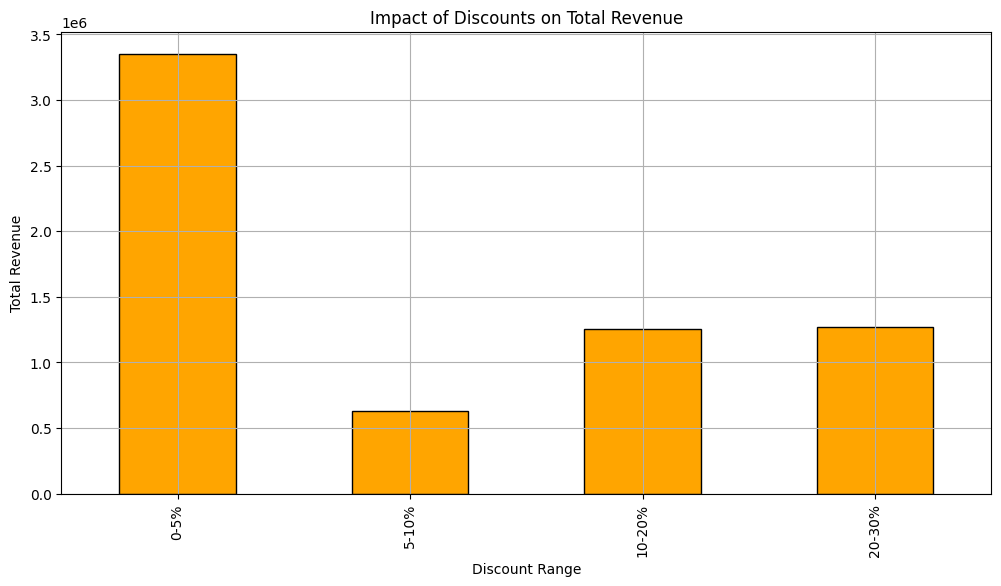

In [15]:
# Step 1: Categorizing transactions into discount ranges
data['Discount Range'] = pd.cut(data['Discount Applied'], bins=[0, 5, 10, 20, 30], labels=['0-5%', '5-10%', '10-20%', '20-30%'])

# Step 2: Calculating total revenue and average amount for each discount range
discount_impact = data.groupby('Discount Range').agg(
    Total_Revenue=('Amount', 'sum'),
    Average_Amount=('Amount', 'mean'),
    Transaction_Count=('Transaction ID', 'count')
).sort_index()

# Visualizing the impact of discounts on sales
plt.figure(figsize=(12, 6))
discount_impact['Total_Revenue'].plot(kind='bar', color='orange', edgecolor='black')
plt.title('Impact of Discounts on Total Revenue')
plt.xlabel('Discount Range')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Displaying the detailed impact of discounts on sales
# tools.display_dataframe_to_user(name="Discount Impact on Sales", dataframe=discount_impact)



The bar chart and summary table illustrate the impact of different discount ranges on sales:

* Discount Range (0-5%) generates the highest total revenue, indicating that the majority of transactions occur with minimal or no discounts.
* As discounts increase beyond 5%, there is a rise in total revenue, with a significant jump in the 10-20% and 20-30% discount ranges.
* The Average Transaction Amount remains relatively consistent across all discount ranges, suggesting that higher discounts do not significantly change the average amount per transaction.


Insights and Recommendations:
* Higher Discounts Drive Volume: Increasing discounts beyond 5% appears to encourage more transactions, as seen in the higher number of transactions in the 10-20% and 20-30% ranges.
* Balanced Discount Strategy: Maintaining moderate discounts (in the range of 10-20%) can be an effective strategy to boost total revenue without drastically affecting the average transaction amount.
* Minimal Discount Effectiveness: Given that minimal discounts still contribute significantly to revenue, the store might explore offering low discounts more frequently to balance between profitability and sales volume.


**Age and Revenue Relationship**

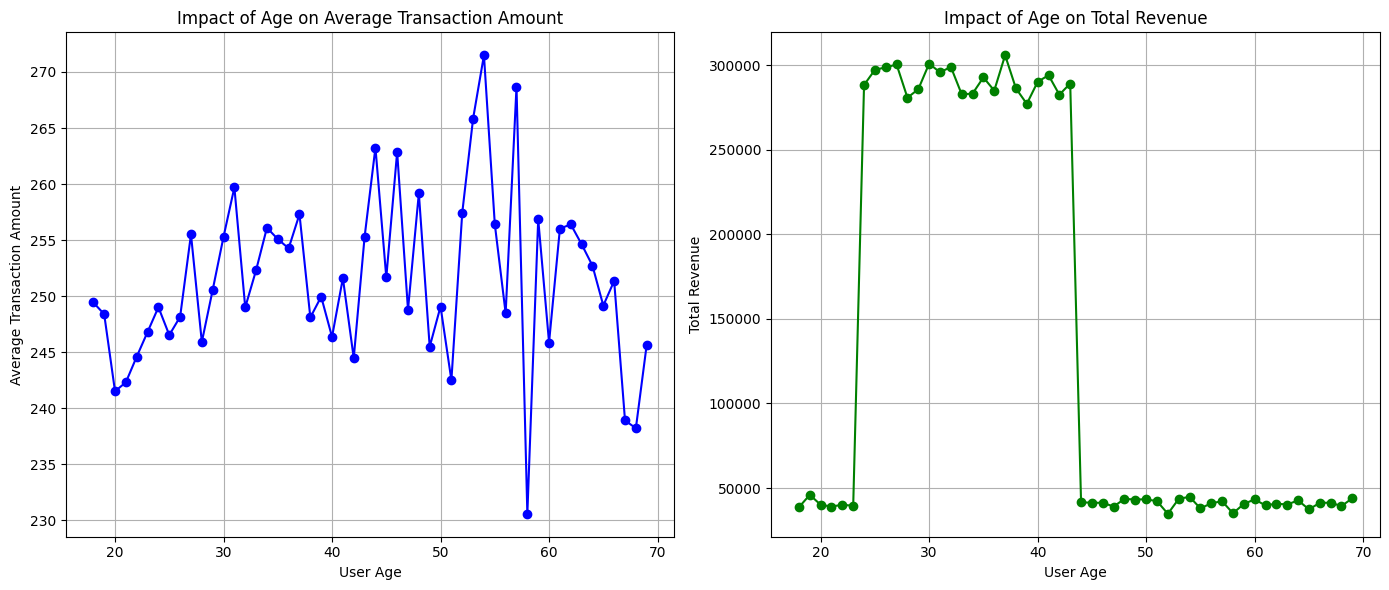

In [16]:
# Step 1: Analyzing the impact of age on average transaction amount and total revenue

# Grouping data by age and calculating average transaction amount and total revenue
age_impact = data.groupby('User Age').agg(
    Average_Amount=('Amount', 'mean'),
    Total_Revenue=('Amount', 'sum'),
    Transaction_Count=('Transaction ID', 'count')
)

# Visualizing the impact of age on average transaction amount
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
age_impact['Average_Amount'].plot(kind='line', marker='o', color='blue')
plt.title('Impact of Age on Average Transaction Amount')
plt.xlabel('User Age')
plt.ylabel('Average Transaction Amount')
plt.grid(True)

# Visualizing the impact of age on total revenue
plt.subplot(1, 2, 2)
age_impact['Total_Revenue'].plot(kind='line', marker='o', color='green')
plt.title('Impact of Age on Total Revenue')
plt.xlabel('User Age')
plt.ylabel('Total Revenue')
plt.grid(True)

plt.tight_layout()
plt.show()



The line charts and table present the impact of age on average transaction amount and total revenue. Here's what the analysis reveals:

Average Transaction Amount by Age:

1. The average transaction amount remains relatively stable across different age groups, with only minor fluctuations. This suggests that user spending behavior does not vary significantly by age when it comes to the average amount per transaction.
Total Revenue by Age:

2. The total revenue generated by users in their mid-30s to early 40s is noticeably higher. This trend aligns with the age distribution analysis, indicating that this age group constitutes a significant portion of the store’s customer base.


**Do gender differences impact revenue?**

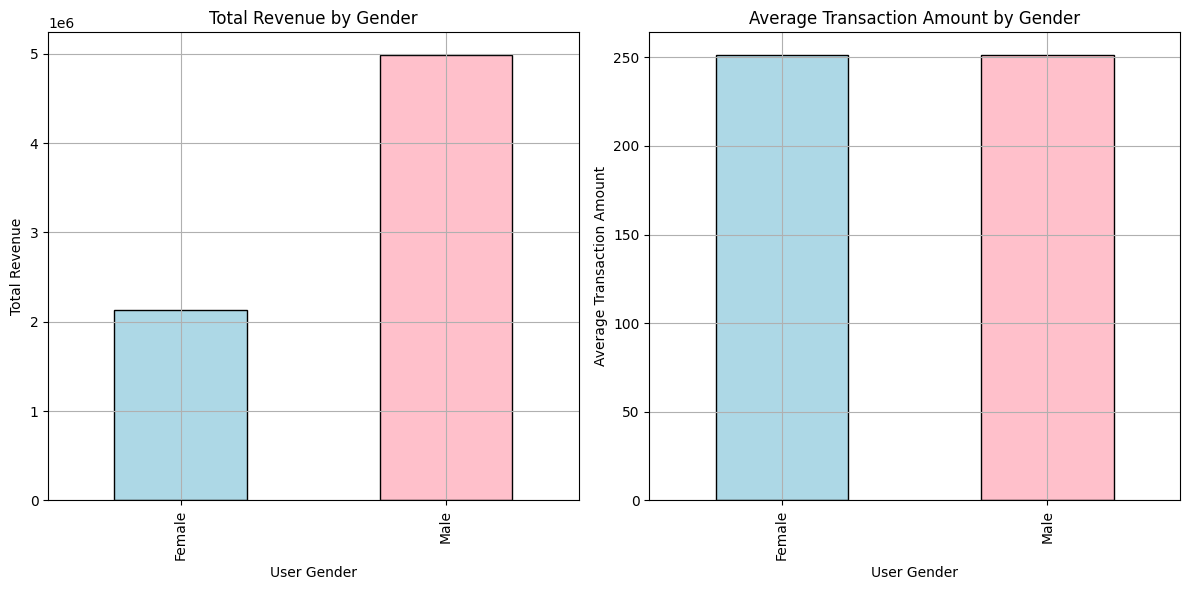

In [17]:
# Step 1: Analyzing the impact of gender on total revenue and average transaction amount
gender_impact = data.groupby('User Gender').agg(
    Total_Revenue=('Amount', 'sum'),
    Average_Amount=('Amount', 'mean'),
    Transaction_Count=('Transaction ID', 'count')
)

# Visualizing the impact of gender on total revenue and average transaction amount
plt.figure(figsize=(12, 6))

# Plot for total revenue by gender
plt.subplot(1, 2, 1)
gender_impact['Total_Revenue'].plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title('Total Revenue by Gender')
plt.ylabel('Total Revenue')
plt.grid(True)

# Plot for average transaction amount by gender
plt.subplot(1, 2, 2)
gender_impact['Average_Amount'].plot(kind='bar', color=['lightblue', 'pink'], edgecolor='black')
plt.title('Average Transaction Amount by Gender')
plt.ylabel('Average Transaction Amount')
plt.grid(True)

plt.tight_layout()
plt.show()



The analysis shows gender differences in revenue generation:

1. Total Revenue:
* Male users generated significantly more total revenue ($4.99M) compared to Female users ($2.14M). This suggests that male users contribute a larger share to the overall sales.
2. Average Transaction Amount:
* The average transaction amounts are nearly identical between male and female users, around $251. This indicates that although male users generate more total revenue, individual purchase behavior in terms of spending amount is very similar across genders.


Insights and Recommendations:
1. Engage Female Customers: While the average transaction value is similar, there are fewer transactions from female users. This could suggest a need to better engage female customers through targeted campaigns, product offerings, or personalized experiences.
2. Explore Male Customer Behavior: Since male users are contributing significantly to total revenue, exploring the products and categories preferred by male users could further capitalize on this demographic.
3. Tailored Marketing Strategies: Gender-based personalization in marketing strategies could be effective, focusing on preferences and trends specific to each group

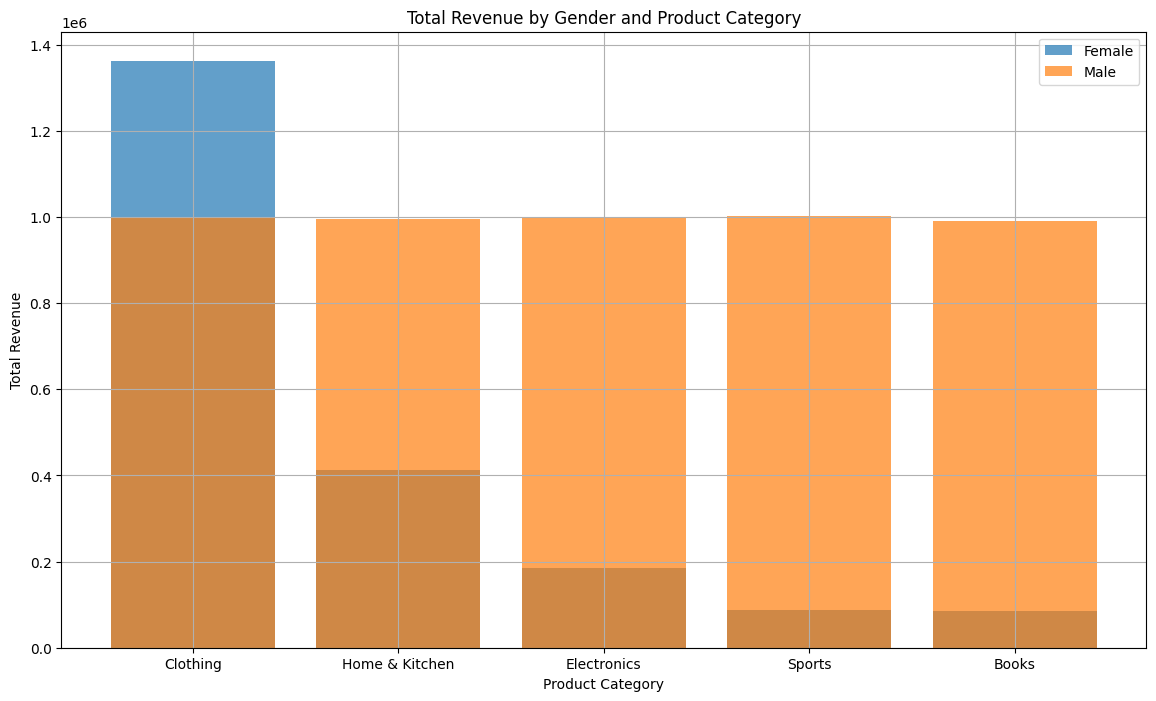

In [18]:
# Step 1: Further investigation into gender-based purchasing behavior by product category

# Grouping data by gender and product category to analyze total revenue and average amount
gender_product_impact = data.groupby(['User Gender', 'Product Category']).agg(
    Total_Revenue=('Amount', 'sum'),
    Average_Amount=('Amount', 'mean'),
    Transaction_Count=('Transaction ID', 'count')
).sort_values(by='Total_Revenue', ascending=False).reset_index()

# Visualizing the revenue distribution by gender and product category
plt.figure(figsize=(14, 8))
for gender in gender_product_impact['User Gender'].unique():
    subset = gender_product_impact[gender_product_impact['User Gender'] == gender]
    plt.bar(subset['Product Category'], subset['Total_Revenue'], alpha=0.7, label=gender)

plt.title('Total Revenue by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.legend()
plt.grid(True)
plt.show()



**Which are the most popular products?**

# **Feature Engineering**

**RFM Features**
RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

* Recency (R): This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.
* Frequency (F): This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.
* Monetary (M): This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.




**Recency**

In [19]:

data.sort_values(by=['User ID', 'Transaction DateTime'], inplace=True)
# Combine date and time columns to create a full datetime column
data['Transaction Date'] = data['Transaction DateTime'].dt.date

# Find the most recent purchase date for each User ID
customer_data = data.groupby('User ID')['Transaction Date'].max().reset_index()

#  Find the most recent transaction date in the entire dataset
most_recent_date = data['Transaction Date'].max()

#  Calculate the number of days since the last purchase for each user
customer_data['Transaction Date'] = pd.to_datetime(customer_data['Transaction Date'])
most_recent_date = pd.to_datetime(most_recent_date)
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['Transaction Date']).dt.days

#  Remove the 'Transaction Date' column for cleaner output
customer_data.drop(columns=['Transaction Date'], inplace=True)

# Showing the top 5 rows as a summary
customer_data.head()

,User ID,Days_Since_Last_Purchase
0,1000,10
1,1001,6
2,1002,348
3,1003,13
4,1004,24


In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

**Days Since Last Purchase**: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.


I've named the customer-centric dataframe as ***customer_data***, which will eventually contain all the customer-based features we plan to create.



**Frequency**

In [20]:
# Step 1: Calculate the total number of transactions made by each customer
total_transactions = data.groupby('User ID')['Transaction ID'].nunique().reset_index()
total_transactions.rename(columns={'Transaction ID': 'Total_Transactions'}, inplace=True)

# Step 2: Calculate the total number of products purchased by each customer
total_products_purchased = data.groupby('User ID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Step 3: Merge the new features into the customer_data DataFrame
customer_data = pd.merge(customer_data, total_transactions, on='User ID')
customer_data = pd.merge(customer_data, total_products_purchased, on='User ID')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,1000,10,3,5
1,1001,6,1,2
2,1002,348,1,2
3,1003,13,1,4
4,1004,24,1,2
5,1006,128,1,3
6,1007,102,1,4
7,1008,7,2,5
8,1009,5,3,8
9,1011,90,2,5


In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:

Total Transactions: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.
Total Products Purchased: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.



**Monetary**

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

* **Total Spend**: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of UnitPrice and Quantity for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.
* **Average Transaction Value**: This feature is calculated as the Total Spend divided by the Total Transactions for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.


In [21]:
# Step 1: Calculate the total spend by each customer
data['Total_Spend'] = data['Product Price'] * data['Quantity']
total_spend = data.groupby('User ID')['Total_Spend'].sum().reset_index()

# Step 2: Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='User ID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Step 3: Merge the new features into the customer_data DataFrame
customer_data = pd.merge(customer_data, total_spend, on='User ID')
customer_data = pd.merge(customer_data, average_transaction_value[['User ID', 'Average_Transaction_Value']], on='User ID')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,1000,10,3,5,566.30,188.766667
1,1001,6,1,2,209.40,209.400000
2,1002,348,1,2,266.00,266.000000
3,1003,13,1,4,438.00,438.000000
4,1004,24,1,2,219.40,219.400000
5,1006,128,1,3,284.37,284.370000
6,1007,102,1,4,412.40,412.400000
7,1008,7,2,5,454.20,227.100000
8,1009,5,3,8,770.90,256.966667
9,1011,90,2,5,477.30,238.650000


**Behavioural**

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

* **Average Days Between Purchases**: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.
* **Favorite Shopping Day**: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.
* **Favorite Shopping Hour**: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.



In [22]:
# Step 1: Extract day of the week and hour from 'Transaction DateTime'

data['Day_Of_Week'] = data['Transaction DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['Hour'] = data['Transaction DateTime'].dt.hour

# Step 2: Calculate average number of days between consecutive purchases for each customer
days_between_purchases = data.groupby('User ID')['Transaction DateTime'].apply(lambda x: x.diff().dropna().apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('User ID').mean().reset_index()
average_days_between_purchases.rename(columns={'Transaction DateTime': 'Average_Days_Between_Purchases'}, inplace=True)

# Step 3: Find the favorite shopping day of the week for each customer
favorite_shopping_day = data.groupby(['User ID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('User ID')['Count'].idxmax()][['User ID', 'Day_Of_Week']]

# Step 4: Find the favorite shopping hour for each customer
favorite_shopping_hour = data.groupby(['User ID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('User ID')['Count'].idxmax()][['User ID', 'Hour']]

# Step 5: Merge the new features into the customer_data DataFrame
customer_data = pd.merge(customer_data, average_days_between_purchases, on='User ID', how='left')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='User ID', how='left')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


<ipython-input-22-a44ca35082ae>:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = data.groupby('User ID')['Transaction DateTime'].apply(lambda x: x.diff().dropna().apply(lambda y: y.days))


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,1000,10,3,5,566.30,188.766667,170.0,1,1
1,1001,6,1,2,209.40,209.400000,NaN,6,2
2,1002,348,1,2,266.00,266.000000,NaN,0,6
3,1003,13,1,4,438.00,438.000000,NaN,6,8
4,1004,24,1,2,219.40,219.400000,NaN,2,2
5,1006,128,1,3,284.37,284.370000,NaN,3,11
6,1007,102,1,4,412.40,412.400000,NaN,1,2
7,1008,7,2,5,454.20,227.100000,0.0,4,0
8,1009,5,3,8,770.90,256.966667,106.5,0,12
9,1011,90,2,5,477.30,238.650000,38.0,3,4


**Cancellation Insights**

In this step, I am going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

* **Cancellation Frequency**: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.
* **Cancellation Rate**: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.



In [23]:
# Step 1: Calculate the number of cancelled transactions for each customer
cancelled_transactions = data[data['Transaction Status'] == 'Canceled']
cancellation_frequency = cancelled_transactions.groupby('User ID')['Transaction ID'].nunique().reset_index()
cancellation_frequency.rename(columns={'Transaction ID': 'Cancellation_Frequency'}, inplace=True)

# Step 2: Merge the Cancellation Frequency data into the customer_data DataFrame
customer_data = pd.merge(customer_data, cancellation_frequency, on='User ID', how='left')

# Step 3: Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Step 4: Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / customer_data['Total_Transactions']

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)



<ipython-input-23-4e4c0485f143>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data['Cancellation_Frequency'].fillna(0, inplace=True)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000


**Seasonality & Trends**


In this step, I will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

* **Monthly_Spending_Mean**: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.
* **Monthly_Spending_Std**: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.
* **Spending_Trend**: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.
By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.

In [24]:
from scipy.stats import linregress
import numpy as np

# Step 1: Extract month and year from 'Transaction DateTime'
data['Year'] = data['Transaction DateTime'].dt.year
data['Month'] = data['Transaction DateTime'].dt.month

# Step 2: Calculate monthly spending for each customer
monthly_spending = data.groupby(['User ID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Step 3: Calculate seasonal buying patterns (mean and standard deviation of monthly spending)
seasonal_buying_patterns = monthly_spending.groupby('User ID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0 (implying no variability for customers with single transaction month)
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Step 4: Define a function to calculate spending trend
def calculate_trend(spend_data):
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    else:
        return 0  # Return 0 if only one data point exists

# Apply the function to calculate spending trend for each customer
spending_trends = monthly_spending.groupby('User ID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Step 5: Merge new features into the customer_data DataFrame
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='User ID', how='left')
customer_data = pd.merge(customer_data, spending_trends, on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


<ipython-input-24-3cb3d89aa6de>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000,188.766667,99.031830,12.3
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000,209.400000,0.000000,0.0
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000,266.000000,0.000000,0.0
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000,438.000000,0.000000,0.0
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000,219.400000,0.000000,0.0
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000,284.370000,0.000000,0.0
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000,412.400000,0.000000,0.0
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000,454.200000,0.000000,0.0
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333,385.450000,291.681547,412.5
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000,238.650000,95.247283,134.7


**Location**

In [25]:
# Step 1: Group by 'User ID' and 'User Location' to get the number of transactions per location for each user
user_location_counts = data.groupby(['User ID', 'User Location']).size().reset_index(name='Number_of_Transactions')

# Step 2: Get the most common location for each user
user_main_location = user_location_counts.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('User ID')

# Step 3: Merge this main location data with the customer_data DataFrame
customer_data = pd.merge(customer_data, user_main_location[['User ID', 'User Location']], on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,User Location
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000,188.766667,99.031830,12.3,Athens
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000,209.400000,0.000000,0.0,Patras
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000,266.000000,0.000000,0.0,Athens
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000,438.000000,0.000000,0.0,Athens
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000,219.400000,0.000000,0.0,Athens
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000,284.370000,0.000000,0.0,Patras
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000,412.400000,0.000000,0.0,Thessaloniki
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000,454.200000,0.000000,0.0,Athens
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333,385.450000,291.681547,412.5,Heraklion
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000,238.650000,95.247283,134.7,Chalkida


In [26]:
a = customer_data.copy()
# Step 1: Group by CustomerID and User Location to count transactions per location
customer_location = a.groupby(['User ID', 'User Location']).size().reset_index(name='Number_of_Transactions')

# Step 2: Get the main location for each customer based on the maximum transactions
customer_main_location = customer_location.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('User ID')

# Step 3: Create a binary column indicating whether the main location is Athens
customer_main_location['Is_Athens'] = customer_main_location['User Location'].apply(lambda x: 1 if x == 'Athens' else 0)

# Step 4: Merge this information with the customer_data DataFrame
customer_data = pd.merge(customer_data, customer_main_location[['User ID', 'Is_Athens']], on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
print(customer_data.head())


   User ID  Days_Since_Last_Purchase  Total_Transactions  \
0     1000                        10                   3   
1     1001                         6                   1   
2     1002                       348                   1   
3     1003                        13                   1   
4     1004                        24                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         5        566.3                 188.766667   
1                         2        209.4                 209.400000   
2                         2        266.0                 266.000000   
3                         4        438.0                 438.000000   
4                         2        219.4                 219.400000   

   Average_Days_Between_Purchases  Day_Of_Week  Hour  Cancellation_Frequency  \
0                           170.0            1     1                     0.0   
1                             NaN            6     2

**User Age**

In [27]:
# Step 1: Extract the 'User Age' column for each user
user_age = data[['User ID', 'User Age']].drop_duplicates('User ID')

# Step 2: Merge the age data with the customer_data DataFrame
customer_data = pd.merge(customer_data, user_age, on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,User Location,Is_Athens,User Age
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000,188.766667,99.031830,12.3,Athens,1,38
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000,209.400000,0.000000,0.0,Patras,0,40
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000,266.000000,0.000000,0.0,Athens,1,36
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000,438.000000,0.000000,0.0,Athens,1,25
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000,219.400000,0.000000,0.0,Athens,1,30
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000,284.370000,0.000000,0.0,Patras,0,28
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000,412.400000,0.000000,0.0,Thessaloniki,0,33
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000,454.200000,0.000000,0.0,Athens,1,50
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333,385.450000,291.681547,412.5,Heraklion,0,24
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000,238.650000,95.247283,134.7,Chalkida,0,37


**Discount Rate**
Since discount rate plays a huge role on whether a customer will purchase a product, then we need to include it as a feature.

To include Discount Rate as a feature in the customer dataset, we will calculate the average or total discount applied per user. This can provide insight into how often or how much discount a customer typically benefits from, which could influence their purchasing behavior.



In [28]:
# Step 1: Calculate the average discount rate for each user
average_discount_rate = data.groupby('User ID')['Discount Applied'].mean().reset_index()
average_discount_rate.rename(columns={'Discount Applied': 'Average_Discount_Rate'}, inplace=True)

# Step 2: Merge the average discount rate into the customer_data DataFrame
customer_data = pd.merge(customer_data, average_discount_rate, on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,User Location,Is_Athens,User Age,Average_Discount_Rate
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000,188.766667,99.031830,12.3,Athens,1,38,10.000000
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000,209.400000,0.000000,0.0,Patras,0,40,10.000000
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000,266.000000,0.000000,0.0,Athens,1,36,5.000000
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000,438.000000,0.000000,0.0,Athens,1,25,10.000000
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000,219.400000,0.000000,0.0,Athens,1,30,10.000000
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000,284.370000,0.000000,0.0,Patras,0,28,0.000000
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000,412.400000,0.000000,0.0,Thessaloniki,0,33,10.000000
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000,454.200000,0.000000,0.0,Athens,1,50,5.000000
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333,385.450000,291.681547,412.5,Heraklion,0,24,6.666667
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000,238.650000,95.247283,134.7,Chalkida,0,37,7.500000


**User Gender**

In [29]:
# Step 1: Extract the 'User Gender' column for each user
user_gender = data[['User ID', 'User Gender']].drop_duplicates('User ID')

# Step 2: Merge the gender data with the customer_data DataFrame
customer_data = pd.merge(customer_data, user_gender, on='User ID', how='left')

# Display the first few rows of the updated customer_data DataFrame
customer_data.head(10)


,User ID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,User Location,Is_Athens,User Age,Average_Discount_Rate,User Gender
0,1000,10,3,5,566.30,188.766667,170.0,1,1,0.0,0.000000,188.766667,99.031830,12.3,Athens,1,38,10.000000,Female
1,1001,6,1,2,209.40,209.400000,NaN,6,2,0.0,0.000000,209.400000,0.000000,0.0,Patras,0,40,10.000000,Male
2,1002,348,1,2,266.00,266.000000,NaN,0,6,0.0,0.000000,266.000000,0.000000,0.0,Athens,1,36,5.000000,Male
3,1003,13,1,4,438.00,438.000000,NaN,6,8,0.0,0.000000,438.000000,0.000000,0.0,Athens,1,25,10.000000,Male
4,1004,24,1,2,219.40,219.400000,NaN,2,2,0.0,0.000000,219.400000,0.000000,0.0,Athens,1,30,10.000000,Male
5,1006,128,1,3,284.37,284.370000,NaN,3,11,0.0,0.000000,284.370000,0.000000,0.0,Patras,0,28,0.000000,Male
6,1007,102,1,4,412.40,412.400000,NaN,1,2,0.0,0.000000,412.400000,0.000000,0.0,Thessaloniki,0,33,10.000000,Male
7,1008,7,2,5,454.20,227.100000,0.0,4,0,0.0,0.000000,454.200000,0.000000,0.0,Athens,1,50,5.000000,Female
8,1009,5,3,8,770.90,256.966667,106.5,0,12,1.0,0.333333,385.450000,291.681547,412.5,Heraklion,0,24,6.666667,Male
9,1011,90,2,5,477.30,238.650000,38.0,3,4,0.0,0.000000,238.650000,95.247283,134.7,Chalkida,0,37,7.500000,Male


In [35]:
# prompt: drop user location from customer data

# Drop the 'User Location' column from customer_data
customer_data = customer_data.drop('User Location', axis=1)

**Add Product Category**

Target Encoding could be used to include product category in the future

**Correlation**

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.



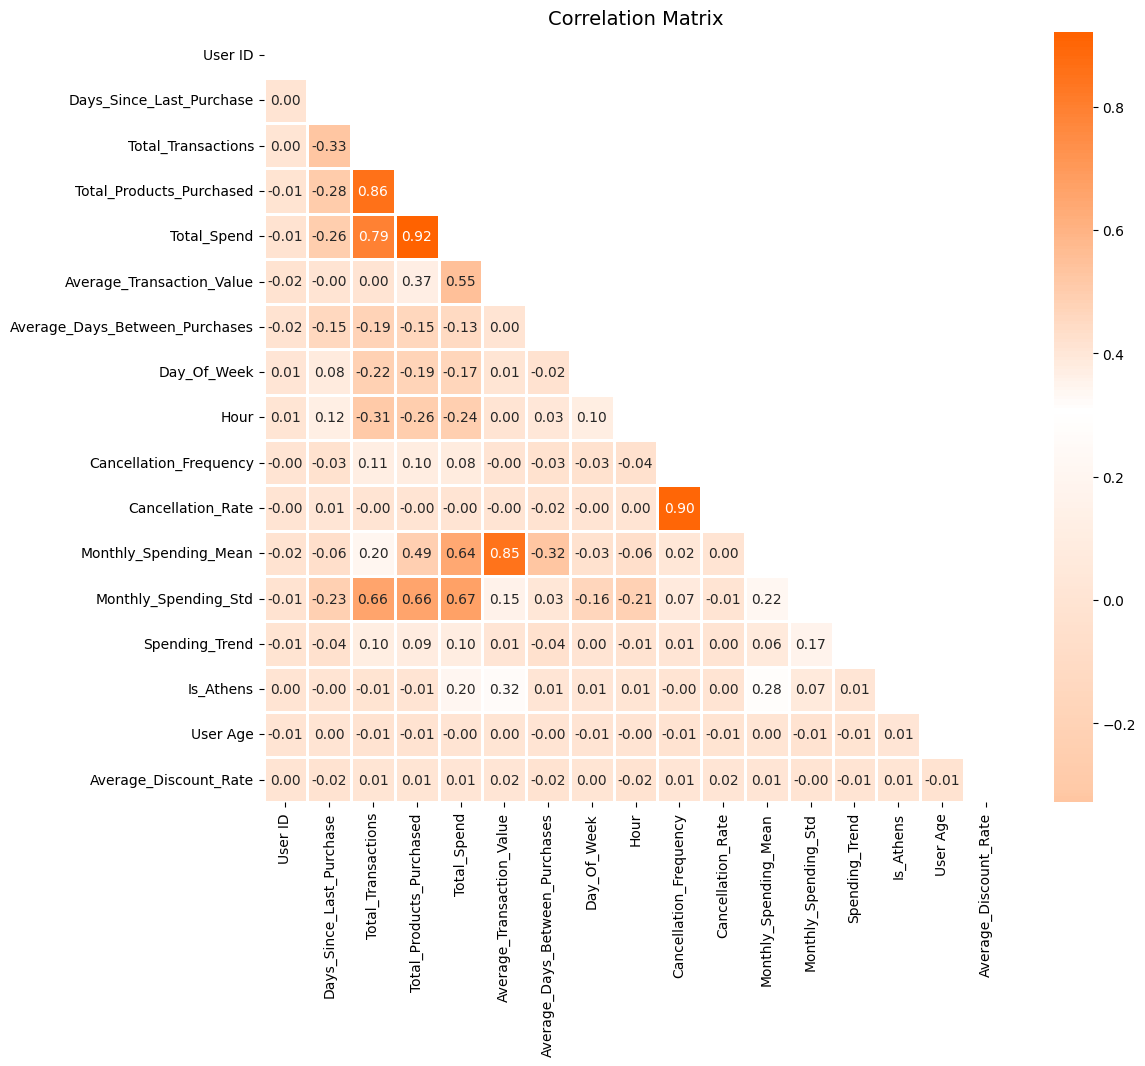

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


# Step 1: Filter only numeric columns for correlation analysis
numeric_customer_data = customer_data.select_dtypes(include=[np.number])

# Step 2: Calculate the correlation matrix
corr = numeric_customer_data.corr()


# Redefine the custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Step 3: Proceed with the heatmap visualization
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()




Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance: *Monthly_Spending_Mean* and *Average_Transaction_Value*

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.




**Encode Categorical Features**

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Step 1: Initialize the StandardScaler and OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Step 2: Create a ColumnTransformer to handle one-hot encoding and scaling
column_transformer = ColumnTransformer(
    transformers=[
        ('num', scaler, customer_data.select_dtypes(include=[np.number]).columns.difference(['User ID', 'Day_Of_Week'])),
        ('cat', encoder, ['User Gender']),
    ],
    remainder='passthrough'  # Keeps other columns unchanged
)

# Step 3: Fit and transform the customer_data
customer_data_encoded_scaled = column_transformer.fit_transform(customer_data)

# Step 4: Extract the encoder instance and get feature names
encoder_fitted = column_transformer.named_transformers_['cat']
encoded_feature_names = encoder_fitted.get_feature_names_out(['User Gender'])

# Create a complete list of column names by appending User ID and Day_Of_Week
# Exclude columns 'User ID' and 'Day_Of_Week' from numeric scaling, but add them to the final DataFrame columns
all_feature_names = customer_data.select_dtypes(include=[np.number]).columns.difference(['User ID', 'Day_Of_Week']).tolist() + encoded_feature_names.tolist() + ['User ID', 'Day_Of_Week']

# Check the number of columns in the transformed data
print("Number of columns in transformed data:", customer_data_encoded_scaled.shape[1])
print("Number of feature names:", len(all_feature_names))

# If there is a mismatch, adjust the feature names accordingly
if customer_data_encoded_scaled.shape[1] != len(all_feature_names):
    # Trim or expand the all_feature_names list to match the number of columns
    all_feature_names = all_feature_names[:customer_data_encoded_scaled.shape[1]]

# Convert the transformed data back into a DataFrame
customer_data_encoded_scaled_df = pd.DataFrame(customer_data_encoded_scaled, columns=all_feature_names)

# Display the first few rows of the transformed data
print(customer_data_encoded_scaled_df.head(10))




Number of columns in transformed data: 18
Number of feature names: 18
   Average_Days_Between_Purchases  Average_Discount_Rate  \
0                        0.579274              -0.147070   
1                             NaN              -0.147070   
2                             NaN              -0.764709   
3                             NaN              -0.147070   
4                             NaN              -0.147070   
5                             NaN              -1.382348   
6                             NaN              -0.147070   
7                       -1.254032              -0.764709   
8                       -0.105520              -0.558829   
9                       -0.844235              -0.455890   

   Average_Transaction_Value  Cancellation_Frequency  Cancellation_Rate  \
0                  -0.586583               -0.232114          -0.212559   
1                  -0.392914               -0.232114          -0.212559   
2                   0.138345               -

**Feature Scaling**

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

* For **K-means Clustering**: K-means relies heavily on the concept of 'distance' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
* For **PCA**: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data(Future Work, no time for that).


In [41]:
import pandas as pd

# Ensure 'all_feature_names' includes all the feature column names in the correct order.
customer_data_encoded_scaled_df = pd.DataFrame(customer_data_encoded_scaled, columns=all_feature_names)
customer_data_encoded_scaled_df['Average_Days_Between_Purchases'].fillna(0, inplace=True)


<ipython-input-41-e5857e6a38a7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_data_encoded_scaled_df['Average_Days_Between_Purchases'].fillna(0, inplace=True)


**Which are the most popular products?**

**Clustering** : Perform clustering analysis on transaction data and identify distinct user segments

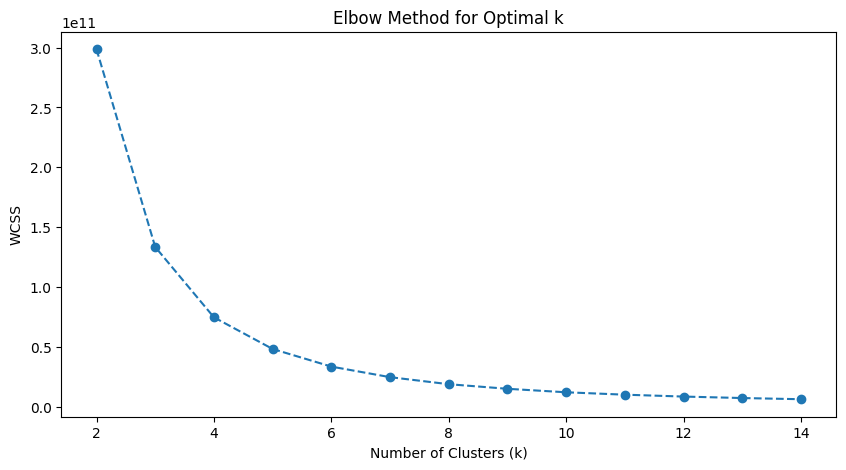

In [42]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# Optional: Reduce dimensions for easier visualization
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_encoded_scaled_df)

# List to store the WCSS (Within-Cluster Sum of Squares)
wcss = []

# Range of k values to test
k_values = range(2, 15)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(customer_data_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method chart
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()



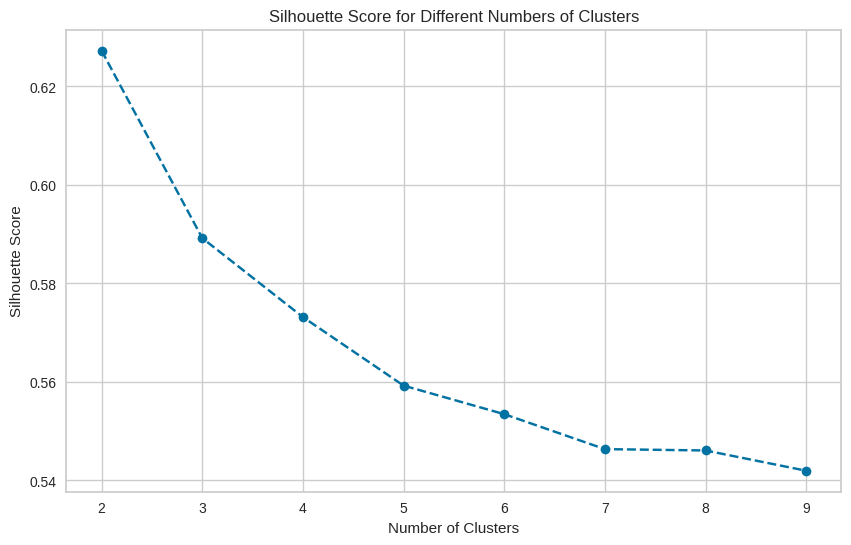

In [47]:
from sklearn.metrics import silhouette_score


# Calculating silhouette scores for different numbers of clusters for plotting
silhouette_scores = []
range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(customer_data_pca)
    silhouette_avg = silhouette_score(customer_data_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()



<ipython-input-45-15732479b16f>:54: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


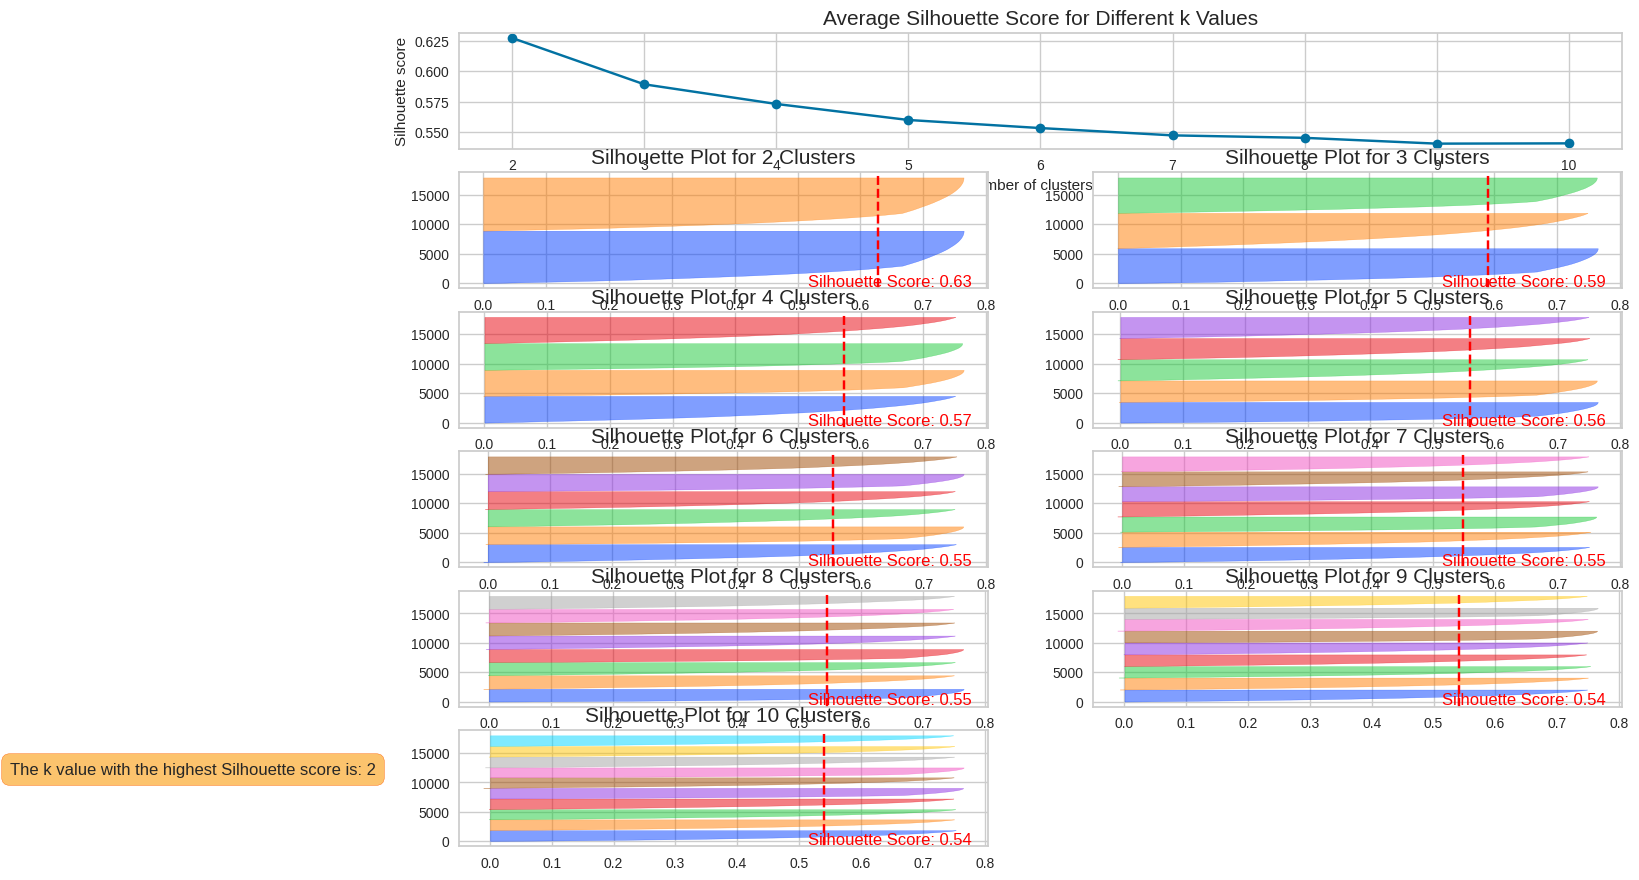

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

# Function for silhouette analysis
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """
    plt.figure(figsize=figsize)
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)
    first_plot = plt.subplot(grid[0, :])
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    first_plot.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    first_plot.set_xticks(range(start_k, stop_k + 1))
    first_plot.set_xlabel('Number of clusters (k)')
    first_plot.set_ylabel('Silhouette score')
    first_plot.set_title('Average Silhouette Score for Different k Values', fontsize=15)

    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    first_plot.text(0.97, 0.02, optimal_k_text, fontsize=12, verticalalignment='bottom',
                    horizontalalignment='right', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))

    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, ha='right', transform=ax.transAxes, color='red')
        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

# Assuming 'customer_data_encoded_scaled_df' is the DataFrame ready for clustering
silhouette_analysis(customer_data_encoded_scaled_df, start_k=2, stop_k=10)


Guidelines to Interpret Silhouette Plots and Determine the Optimal K:

To interpret silhouette plots and identify the optimal number of clusters (( k )), consider the following criteria:

* 1️⃣ Analyze the Silhouette Plots:

Silhouette Score Width:

  * Wide Widths (closer to +1): Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
  * Narrow Widths (closer to -1): Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.
Average Silhouette Score:

High Average Width: A cluster with a high average silhouette score indicates well-separated clusters.
Low Average Width: A cluster with a low average silhouette score indicates poor separation between clusters.
* 2️⃣ Uniformity in Cluster Size:

   * Cluster Thickness:

   *  Uniform Thickness: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.

   * Variable Thickness: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.

* 3️⃣ Peaks in Average Silhouette Score:
  * Clear Peaks: A clear peak in the average silhouette score plot for a specific ( k ) value indicates this ( k ) might be optimal.
* 4️⃣ Minimize Fluctuations in Silhouette Plot Widths:
  * Uniform Widths: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
  * Variable Widths: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.
* 5️⃣ Optimal Cluster Selection:
  * Maximize the Overall Average Silhouette Score: Choose the ( k ) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
  * Avoid Below-Average Silhouette Scores: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.
* 6️⃣ Visual Inspection of Silhouette Plots:
  * Consistent Cluster Formation: Visually inspect the silhouette plots for each ( k ) value to evaluate the consistency and structure of the formed clusters.
  * Cluster Compactness: Look for more compact clusters, with data

**Silhouette Score Width**: For k=2, the silhouette score is the highest at approximately 0.63, suggesting that data points within these clusters are better separated from others, implying more defined clusters.

**Uniformity in Cluster Size**: The silhouette plot for k=2 appears more balanced in terms of cluster thickness compared to higher k values, where thickness and widths become more variable, indicating imbalanced cluster sizes.

**Peaks in Average Silhouette Score**: The graph of silhouette scores shows a clear peak at k=2, and the score declines steadily as k increases.

**Minimize Fluctuations in Silhouette Plot Widths**: For k=2, the silhouette plot shows uniform widths, while the plots for higher k values have more variable widths, indicating less consistent clustering.

However the elbow method shows that the most prominent elbow (where the curve bends and flattens) seems to occur around k=3 or k=4.
The choice between k=2, k=3, or k=4 may depend on the business objective. If you prefer fewer, broader clusters for simpler segmentation, k=2 might be suitable. For more nuanced and detailed segmentation, k=3 or k=4 as shown by the elbow method could be optimal.


In [50]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter

# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_encoded_scaled_df)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in enumerate(cluster_frequencies.most_common())}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_encoded_scaled_df['cluster'] = new_labels

# Display the first few rows of the original dataframe
print(customer_data_encoded_scaled_df.head())


   Average_Days_Between_Purchases  Average_Discount_Rate  \
0                        0.579274              -0.147070   
1                        0.000000              -0.147070   
2                        0.000000              -0.764709   
3                        0.000000              -0.147070   
4                        0.000000              -0.147070   

   Average_Transaction_Value  Cancellation_Frequency  Cancellation_Rate  \
0                  -0.586583               -0.232114          -0.212559   
1                  -0.392914               -0.232114          -0.212559   
2                   0.138345               -0.232114          -0.212559   
3                   1.752773               -0.232114          -0.212559   
4                  -0.299052               -0.232114          -0.212559   

   Days_Since_Last_Purchase      Hour  Is_Athens  Monthly_Spending_Mean  \
0                 -0.865269 -1.278400   0.670425              -0.631832   
1                 -0.902926 -1.130596 

Evaluation

<ipython-input-51-60054de191d3>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)


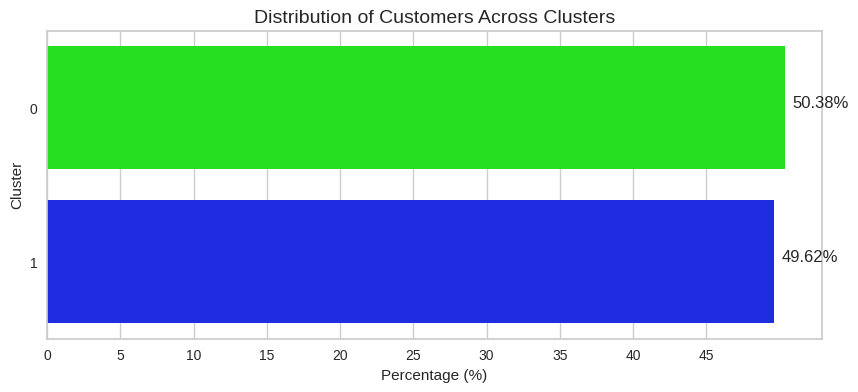

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_encoded_scaled_df['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
colors = sns.color_palette('hsv', len(cluster_percentage))  # Custom color palette for distinct colors
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%')

# Customize the plot
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Cluster')

# Show the plot
plt.show()


In [52]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate

# Compute number of observations
num_observations = len(customer_data_encoded_scaled_df)

# Separate the features and the cluster labels
X = customer_data_encoded_scaled_df.drop('cluster', axis=1)
clusters = customer_data_encoded_scaled_df['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ['Number of Observations', num_observations],
    ['Silhouette Score', sil_score],
    ['Calinski Harabasz Score', calinski_score],
    ['Davies Bouldin Score', davies_score]
]

# Print the table
print(tabulate(table_data, headers=['Metric', 'Value'], tablefmt='pretty'))


+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |       17914        |
|    Silhouette Score     | 0.627268430782636  |
| Calinski Harabasz Score | 53801.67217566681  |
|  Davies Bouldin Score   | 0.4997753137404443 |
+-------------------------+--------------------+


To further scrutinize the quality of our clustering, I will employ the following metrics:

* Silhouette Score: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
* Calinski Harabasz Score: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.
* Davies Bouldin Score: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

* A silhouette score of 0.627 indicates that the clustering is moderately good.
* A score of 53801.67 is quite high, suggesting that the clusters are well-separated with significant between-cluster dispersion. This confirms that the clusters are compact and distinct from each other.
* A score of 0.499 is relatively low, indicating that the clusters have a good level of separation and are not highly similar to each other. This means the clusters are well-distributed and distinct.
